In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as  plt
import seaborn as sns

%matplotlib inline

from statistics import stdev
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [2]:
#Upload the data
from google.colab import files
uploaded = files.upload()

Saving dataset_bmd.csv to dataset_bmd.csv


In [3]:
#Look at the first five instances of data
df = pd.read_csv('dataset_bmd.csv')
df.head()

,Unnamed: 0,Participant ID,Age at recruitment,Sex,Genetic sex,Standing height | Instance 0,Standing height | Instance 1,Standing height | Instance 2,Standing height | Instance 3,Weight | Instance 0(participant - p21002_i0),...,Treatment/medication code | Instance 1,Treatment/medication code | Instance 2,Treatment/medication code | Instance 3,Diagnoses - ICD10,Diagnoses - secondary ICD10,Diagnoses - ICD9,Diagnoses - secondary ICD9,fracture,FRAX_bmd,FRAX_without_bmd
0,2596,6022277,58,0,0.0,149.5,NaN,151.0,NaN,63.6,...,NaN,NaN,NaN,E039|F171|F250|F329|F419|I10|R33|S7200|T814|W0...,E039|F171|F329|F419|I10|R33|Z864|Z911,NaN,NaN,True,2.6,0.6
1,4309,3361500,42,1,1.0,185.0,185.0,186.0,NaN,83.6,...,1140871310|1140865634,1140871310|1140865634,NaN,M8725|N492|N508|S7210|T931|V134|Z470|Z874,T931|Z470|Z874,NaN,NaN,True,0.0,0.1
2,12197,3056510,69,0,0.0,173.0,172.0,172.0,NaN,81.8,...,NaN,1140865634,NaN,D758|E538|I269|J90|K011|K029|K296|K30|K573|K57...,D758|E538|I269|J90|K029|K296|K573|K590|M8199|N...,NaN,NaN,True,0.5,2.5
3,12941,1182673,62,1,1.0,172.0,NaN,171.0,NaN,91.7,...,NaN,NaN,NaN,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,NaN,NaN,True,1.9,0.9
4,15337,4606954,58,0,0.0,158.0,156.0,154.0,NaN,58.9,...,99999,NaN,NaN,H001|I839|N950|R298|R42|Z866|Z871|Z888,R298|Z866|Z871|Z888,NaN,NaN,False,4.3,0.9


In [4]:
#Describe the data
df.describe()

,Unnamed: 0,Participant ID,Age at recruitment,Sex,Genetic sex,Standing height | Instance 0,Standing height | Instance 1,Standing height | Instance 2,Standing height | Instance 3,Weight | Instance 0(participant - p21002_i0),...,Calcium | Instance 1(participant - p100024_i1),Calcium | Instance 2,Calcium | Instance 3,Calcium | Instance 4,Number of treatments/medications taken | Instance 0,Number of treatments/medications taken | Instance 1,Number of treatments/medications taken | Instance 2,Number of treatments/medications taken | Instance 3,FRAX_bmd,FRAX_without_bmd
count,300.000000,3.000000e+02,300.000000,300.000000,293.000000,300.000000,71.000000,295.000000,19.000000,300.000000,...,98.000000,87.000000,114.000000,109.000000,300.000000,72.000000,273.000000,19.000000,300.000000,300.000000
mean,260278.200000,3.200962e+06,57.280000,0.473333,0.474403,169.483667,169.339437,168.721356,171.736842,76.977000,...,954.755816,968.173563,1007.974035,1002.354679,2.033333,1.916667,2.216117,1.315789,1.127333,1.001667
std,143370.259678,1.609800e+06,7.764614,0.500123,0.500199,8.975580,8.118594,9.065940,9.780037,15.020066,...,374.572966,431.965239,370.459250,609.009466,2.395416,2.180257,2.630596,2.161600,1.371540,0.810939
min,2596.000000,1.004467e+06,41.000000,0.000000,0.000000,142.000000,151.000000,142.000000,151.000000,50.200000,...,279.650000,196.900000,156.030000,216.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,140208.750000,1.674056e+06,51.000000,0.000000,0.000000,163.000000,163.750000,162.250000,164.000000,65.675000,...,680.927500,729.160000,726.132500,737.010000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000
50%,266014.500000,3.147242e+06,58.000000,0.000000,0.000000,170.000000,170.000000,170.000000,174.000000,75.200000,...,914.885000,924.110000,979.935000,878.190000,1.000000,1.000000,2.000000,0.000000,0.600000,0.800000
75%,380320.500000,4.574412e+06,64.000000,1.000000,1.000000,176.250000,174.000000,175.000000,180.500000,85.500000,...,1135.662500,1108.520000,1219.772500,1136.510000,3.000000,2.000000,3.000000,2.000000,1.425000,1.500000
max,501096.000000,6.022829e+06,69.000000,1.000000,1.000000,191.000000,188.500000,191.000000,185.000000,139.500000,...,2218.910000,3522.710000,2511.780000,6095.940000,16.000000,10.000000,18.000000,8.000000,11.000000,4.300000


In [5]:
#Look at the column names
df.columns

Index(['Unnamed: 0', 'Participant ID', 'Age at recruitment', 'Sex',
       'Genetic sex', 'Standing height | Instance 0',
       'Standing height | Instance 1', 'Standing height | Instance 2',
       'Standing height | Instance 3',
       'Weight | Instance 0(participant - p21002_i0)',
       ...
       'Treatment/medication code | Instance 1',
       'Treatment/medication code | Instance 2',
       'Treatment/medication code | Instance 3', 'Diagnoses - ICD10',
       'Diagnoses - secondary ICD10', 'Diagnoses - ICD9',
       'Diagnoses - secondary ICD9', 'fracture', 'FRAX_bmd',
       'FRAX_without_bmd'],
      dtype='object', length=160)

In [6]:
df['fracture'].value_counts()

False    187
True     113
Name: fracture, dtype: int64

## Get columns with majority of non missing values for the columns with different instances

In [7]:
instances = set(col.split(' | ')[0] for col in df.columns)
columns=[]
for prefix in instances:
    columns_to_check = [col for col in df.columns if col.startswith(prefix)]
    non_missing_counts = df[columns_to_check].count()
    column_with_max_non_missing = non_missing_counts.idxmax()
    # print(f"For prefix '{prefix}', column with max non-missing values: {column_with_max_non_missing}")
    columns.append(column_with_max_non_missing)

df[columns].head()

,Country of Birth (non-UK origin) | Instance 0,Variation in diet | Instance 2,Weight | Instance 0(participant - p21002_i0),Femur total BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (right) | Instance 2,Femur shaft BMD (bone mineral density) T-score (left) | Instance 0,fracture,FRAX_without_bmd,Pelvis BMC (bone mineral content) | Instance 2,Age at recruitment,...,Femur neck BMC (bone mineral content) (right) | Instance 2,Diagnoses - secondary ICD9,Sex,Femur troch BMD (bone mineral density) (left) | Instance 2,Ever had rheumatoid arthritis affecting one or more joints,Femur troch BMD (bone mineral density) T-score (left) | Instance 2,Femur neck BMC (bone mineral content) (left) | Instance 2,Number of treatments/medications taken | Instance 0,Femur wards BMD (bone mineral density) (right) | Instance 2,Frequency of consuming six or more units of alcohol
0,NaN,3.0,63.6,0.723348,-3.45709,NaN,True,0.6,196.965,58,...,3.40979,NaN,0,0.607564,NaN,-1.658510,3.27879,3,0.460578,NaN
1,NaN,1.0,83.6,0.970351,-1.86609,NaN,True,0.1,384.824,42,...,5.27111,NaN,1,0.944200,0.0,0.129092,10.41750,1,0.717409,2.0
2,NaN,2.0,81.8,0.973764,-1.08754,NaN,True,2.5,322.331,69,...,5.45140,NaN,0,0.695463,0.0,-0.859427,5.62017,0,0.768620,1.0
3,NaN,2.0,91.7,0.763192,-4.02375,NaN,True,0.9,333.434,62,...,3.86018,NaN,1,0.638592,NaN,-2.649160,4.33504,0,0.436912,NaN
4,NaN,2.0,58.9,0.757765,-3.22395,NaN,False,0.9,206.776,58,...,3.29454,NaN,0,0.589251,0.0,-1.824990,3.56223,5,0.490887,1.0


In [8]:
print(len(columns))
columns

64


['Country of Birth (non-UK origin) | Instance 0',
 'Variation in diet | Instance 2',
 'Weight | Instance 0(participant - p21002_i0)',
 'Femur total BMD (bone mineral density) (right) | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (right) | Instance 2',
 'Femur shaft BMD (bone mineral density) T-score (left) | Instance 0',
 'fracture',
 'FRAX_without_bmd',
 'Pelvis BMC (bone mineral content) | Instance 2',
 'Age at recruitment',
 'Femur upper neck BMD (bone mineral density) (right) | Instance 2',
 'Diagnoses - ICD9',
 'Unnamed: 0',
 'Diagnoses - secondary ICD10',
 'Femur lower neck BMD (bone mineral density) (left) | Instance 2',
 'Femur troch BMD (bone mineral density) (right) | Instance 2',
 'Genetic ethnic grouping',
 'Treatment/medication code | Instance 0',
 'Average total household income before tax | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (left) | Instance 2',
 'FRAX_bmd',
 'Participant ID',
 'Diagnoses - ICD10',
 'Alcohol drinker status | 

In [9]:
# Calulate percentage of missing values in each column
missing_data = df.isnull().sum() / len(df) * 100
missing_data


Unnamed: 0                     0.000000
Participant ID                 0.000000
Age at recruitment             0.000000
Sex                            0.000000
Genetic sex                    2.333333
                                ...    
Diagnoses - ICD9              97.333333
Diagnoses - secondary ICD9    99.000000
fracture                       0.000000
FRAX_bmd                       0.000000
FRAX_without_bmd               0.000000
Length: 160, dtype: float64

In [10]:
#Remove those columns that have more than 150 missing values
X=[]
y=[]
excluded=[]
for i, column in enumerate(columns):
  if df[column].isna().sum() < 150:
    X.append(df[column].isna().sum())
    y.append(column)
  else:
    excluded.append(column)
    #df.drop([column], axis=1, inplace=True)
  #print(f"Column {i+1}   {df[column].isna().sum()}")

for column in excluded:
    columns.remove(column)

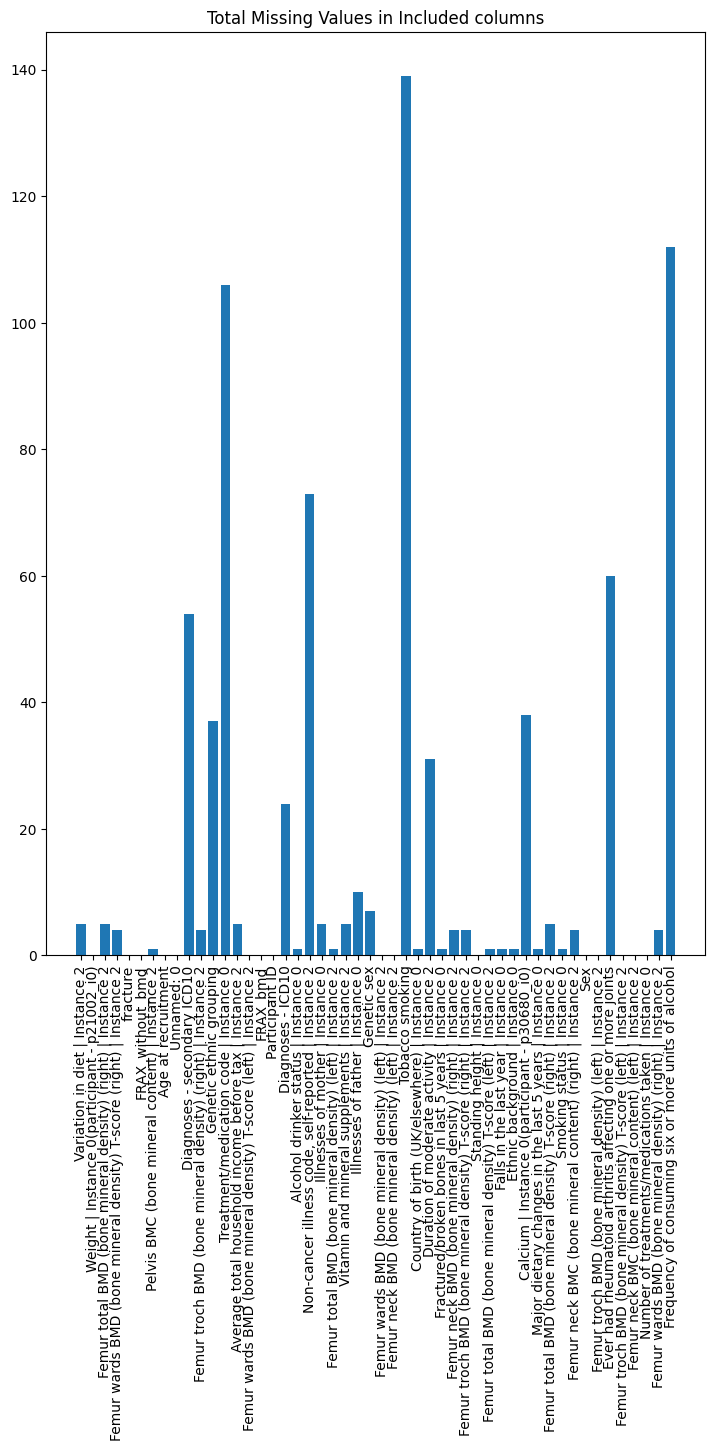

In [11]:
plt.figure(figsize=(10,10))
plt.title("Total Missing Values in Included columns")
plt.bar(y,X)
plt.tight_layout()
plt.xticks(range(len(y)), y, rotation=90)
plt.show()

In [12]:
df[columns].head()

,Variation in diet | Instance 2,Weight | Instance 0(participant - p21002_i0),Femur total BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (right) | Instance 2,fracture,FRAX_without_bmd,Pelvis BMC (bone mineral content) | Instance 2,Age at recruitment,Unnamed: 0,Diagnoses - secondary ICD10,...,Smoking status | Instance 0,Femur neck BMC (bone mineral content) (right) | Instance 2,Sex,Femur troch BMD (bone mineral density) (left) | Instance 2,Ever had rheumatoid arthritis affecting one or more joints,Femur troch BMD (bone mineral density) T-score (left) | Instance 2,Femur neck BMC (bone mineral content) (left) | Instance 2,Number of treatments/medications taken | Instance 0,Femur wards BMD (bone mineral density) (right) | Instance 2,Frequency of consuming six or more units of alcohol
0,3.0,63.6,0.723348,-3.45709,True,0.6,196.965,58,2596,E039|F171|F329|F419|I10|R33|Z864|Z911,...,2.0,3.40979,0,0.607564,NaN,-1.658510,3.27879,3,0.460578,NaN
1,1.0,83.6,0.970351,-1.86609,True,0.1,384.824,42,4309,T931|Z470|Z874,...,0.0,5.27111,1,0.944200,0.0,0.129092,10.41750,1,0.717409,2.0
2,2.0,81.8,0.973764,-1.08754,True,2.5,322.331,69,12197,D758|E538|I269|J90|K029|K296|K573|K590|M8199|N...,...,0.0,5.45140,0,0.695463,0.0,-0.859427,5.62017,0,0.768620,1.0
3,2.0,91.7,0.763192,-4.02375,True,0.9,333.434,62,12941,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,...,1.0,3.86018,1,0.638592,NaN,-2.649160,4.33504,0,0.436912,NaN
4,2.0,58.9,0.757765,-3.22395,False,0.9,206.776,58,15337,R298|Z866|Z871|Z888,...,0.0,3.29454,0,0.589251,0.0,-1.824990,3.56223,5,0.490887,1.0


In [13]:
#These are the columns we got after removing the duplicate instances
# by selecting the instance with maximum non missing values and removing those columns
# that have more than 150 (i.e more than half) missing values
print(len(columns))
columns

50


['Variation in diet | Instance 2',
 'Weight | Instance 0(participant - p21002_i0)',
 'Femur total BMD (bone mineral density) (right) | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (right) | Instance 2',
 'fracture',
 'FRAX_without_bmd',
 'Pelvis BMC (bone mineral content) | Instance 2',
 'Age at recruitment',
 'Unnamed: 0',
 'Diagnoses - secondary ICD10',
 'Femur troch BMD (bone mineral density) (right) | Instance 2',
 'Genetic ethnic grouping',
 'Treatment/medication code | Instance 0',
 'Average total household income before tax | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (left) | Instance 2',
 'FRAX_bmd',
 'Participant ID',
 'Diagnoses - ICD10',
 'Alcohol drinker status | Instance 0',
 'Non-cancer illness code, self-reported | Instance 2',
 'Illnesses of mother | Instance 0',
 'Femur total BMD (bone mineral density) (left) | Instance 2',
 'Vitamin and mineral supplements | Instance 2',
 'Illnesses of father | Instance 0',
 'Genetic sex',
 'Femur 

In [14]:
#These are the columns we excluded from original dataframe after filtering
removed_columns = [col for col in df.columns  if col not in columns]
print(len(removed_columns))
removed_columns

110


['Standing height | Instance 1',
 'Standing height | Instance 2',
 'Standing height | Instance 3',
 'Weight | Instance 0(participant - p23098_i0)',
 'Weight | Instance 1(participant - p21002_i1)',
 'Weight | Instance 1(participant - p23098_i1)',
 'Weight | Instance 2(participant - p21002_i2)',
 'Weight | Instance 2(participant - p23098_i2)',
 'Weight | Instance 3(participant - p21002_i3)',
 'Weight | Instance 3(participant - p23098_i3)',
 'Country of birth (UK/elsewhere) | Instance 1',
 'Country of birth (UK/elsewhere) | Instance 2',
 'Country of Birth (non-UK origin) | Instance 0',
 'Ethnic background | Instance 1',
 'Ethnic background | Instance 2',
 'Average total household income before tax | Instance 0',
 'Average total household income before tax | Instance 1',
 'Average total household income before tax | Instance 3',
 'Smoking status | Instance 1',
 'Smoking status | Instance 2',
 'Smoking status | Instance 3',
 'Alcohol drinker status | Instance 1',
 'Alcohol drinker status | 

In [15]:
df[columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 50 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Variation in diet | Instance 2                                       295 non-null    float64
 1   Weight | Instance 0(participant - p21002_i0)                         300 non-null    float64
 2   Femur total BMD (bone mineral density) (right) | Instance 2          295 non-null    float64
 3   Femur wards BMD (bone mineral density) T-score (right) | Instance 2  296 non-null    float64
 4   fracture                                                             300 non-null    bool   
 5   FRAX_without_bmd                                                     300 non-null    float64
 6   Pelvis BMC (bone mineral content) | Instance 2                       299 non-null    float64
 7   Age at r

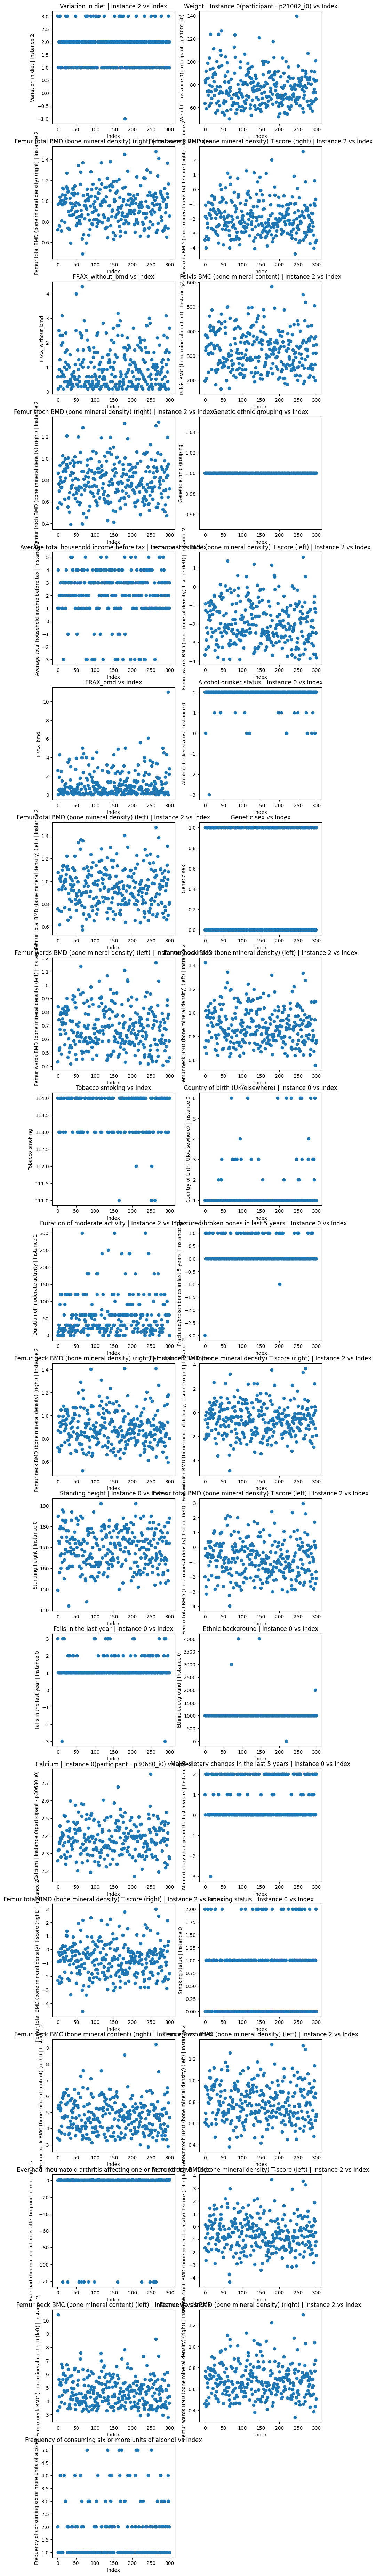

In [16]:
#Plot scatter plot for float and int columns
# Select only float64 columns
import itertools

float_cols = df[columns].select_dtypes(include=['float64']).columns

# No of rows for the fig grid
n = len(float_cols)
ncols = 2
nrows = n // ncols
nrows += n % ncols

# Create a position index for the plots
position = list(itertools.product(range(nrows), range(ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 5*nrows))

for col, pos in zip(float_cols, position):
    ax = axes[pos[0]][pos[1]]
    ax.scatter(df.index, df[col])
    ax.set_xlabel('Index')
    ax.set_ylabel(col)
    ax.set_title(f'{col} vs Index')

# Remove empty subplots
if len(float_cols) % 2 != 0:
    fig.delaxes(axes.flatten()[-1])
plt.show()

In [17]:
# Define a function to handle outliers in a column using IQR method
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column > lower_bound) & (column < upper_bound)]

# Apply the function to handle outliers in column
float_cols = df[columns].select_dtypes(include=['float64', 'int64']).columns
df[float_cols] = handle_outliers(df[float_cols])

##### For many columns there are outliers that we need to handle before using the data to develop a ML model. Looking at the scatter plots lets remove those columns whose show little to no variation


In [18]:
to_drop=[]
to_drop.extend([' Country of birth (UK/elsewhere) | Instance 0', ' Alcohol drinker status | Instance 0','Ever had rheumatoid arthritis affecting one or more joints', 'Ethnic background | Instance 0', 'Genetic ethnic grouping','Average total household income before tax | Instance 2' ,'Tobacco smoking'])
columns = [item for item in columns if item not in to_drop]

In [19]:
#Let's look at object columns
obj_cols = df[columns].select_dtypes(include=['object'])
obj_cols

,Diagnoses - secondary ICD10,Treatment/medication code | Instance 0,Diagnoses - ICD10,"Non-cancer illness code, self-reported | Instance 2",Illnesses of mother | Instance 0,Vitamin and mineral supplements | Instance 2,Illnesses of father | Instance 0
0,E039|F171|F329|F419|I10|R33|Z864|Z911,1140921600|1141191044|1140928274,E039|F171|F250|F329|F419|I10|R33|S7200|T814|W0...,1226|1262,12|10,-7,8|6|1|-27
1,T931|Z470|Z874,1140884488,M8725|N492|N508|S7210|T931|V134|Z470|Z874,1465,-17|-27,-7,8|2|-27
2,D758|E538|I269|J90|K029|K296|K573|K590|M8199|N...,NaN,D758|E538|I269|J90|K011|K029|K296|K30|K573|K57...,1515,8|1|-27,-7,2|-27
3,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,NaN,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,1459|1065|1526,-17|-27,-7,3|2
4,R298|Z866|Z871|Z888,1189|1140909674|1141188442|1140876592|99999,H001|I839|N950|R298|R42|Z866|Z871|Z888,1469|1538,2|1|-27,7,6|-27
...,...,...,...,...,...,...,...
295,NaN,NaN,NaN,1111,9|-27,-7,6|-27
296,F101|F329|I10|K579|M199|M819|T404|T426|X619|X6...,1140879802|2038460150,F101|F314|F329|I10|K573|K579|M199|M819|R194|R9...,1065|1286|1458|1078|1465,NaN,-7,NaN
297,G439|H534|I694|Q211|R42|Z864|Z867,1140883534,G439|H534|I632|I639|I694|Q211|R42|Z136|Z864|Z867,1473|1265|1081|1386|1066|1655|99999,-17|-27,-7,-17|-27
298,B968|F329|I10|N390|W184|Z115|Z501|Z507|Z864|Z874,NaN,B968|F329|I10|N359|N390|S7200|W184|Z038|Z115|Z...,1196,2|-27,-7,2|-27


In [20]:
print(df['Vitamin and mineral supplements | Instance 2'].unique(),'\n')
print(df['Illnesses of mother | Instance 0'].unique(),'\n')
print(df['Illnesses of father | Instance 0'].unique(),'\n')

['-7' '7' '4' '4|7' nan '3|4' '2|3|7' '3|7' '3|4|6' '3' '2|3|4' '2' '1|4'
 '6' '3|4|7' '2|3|4|5|7' '2|7' '-3' '2|4' '4|5' '5' '2|6' '4|6' '1|2|5|6'
 '1|2|3|4|5|6|7' '6|7'] 

['12|10' '-17|-27' '8|1|-27' '2|1|-27' nan '10|-27' '-11|-27' '4|-17'
 '10|8|5' '8|-21' '1|-27' '11|2' '8|2|1|-27' '12|4|-17' '8|4' '9|8|-27'
 '8|-27' '2|-27' '10|9|-27' '11|10' '5|1' '11|5|-17' '8|2|-27' '11|-17'
 '12|8' '10|8|2|1|-27' '6|-27' '6|1|-27' '11|8' '8|5' '3|-17' '6|3'
 '9|-27' '9|8|2|1|-27' '12|-17' '5|-17' '9|8|5|2|1' '8|6|-27' '9|2|-27'
 '10|2|-21' '12|8|1' '-11|-21' '8|4|1' '9|8|3|1' '9|8|5|2' '8|2|1|-21'
 '12|9' '3|2' '4|1' '1|-21' '8|6|1|-27' '10|1|-27' '6|-21' '11|8|2'
 '9|8|4' '12|-11' '9|-21' '12|4|2|1' '10|8|-21' '8|5|2' '5|3|-17'
 '9|1|-27' '9|8|2|-27' '12|1' '9|8|-21' '10|2|-27'] 

['8|6|1|-27' '8|2|-27' '2|-27' '3|2' '6|-27' nan '3|-17' '8|1|-27' '4|-17'
 '2|1|-27' '-17|-27' '6|-21' '10|-27' '8|-27' '-11|-27' '8|2|-21' '6|3|1'
 '1|-27' '6|1|-27' '13|-17' '13|8|1' '10|8|1|-27' '9|1|-21' '12|

##### The columns **Vitamin and mineral supplements | Instance 2**, **Illnesses of mother | Instance 0** and **Illnesses of father | Instance 0** doesn't contain much useful information so lets drop those columns. And lets only use primary ICD10 diagnosis



In [21]:
to_drop=[]
to_drop.extend(['Illnesses of father | Instance 0','Vitamin and mineral supplements | Instance 2', 'Illnesses of mother | Instance 0', 'Diagnoses - secondary ICD10','Treatment/medication code | Instance 0' ])
columns = [item for item in columns if item not in to_drop]
columns

['Variation in diet | Instance 2',
 'Weight | Instance 0(participant - p21002_i0)',
 'Femur total BMD (bone mineral density) (right) | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (right) | Instance 2',
 'fracture',
 'FRAX_without_bmd',
 'Pelvis BMC (bone mineral content) | Instance 2',
 'Age at recruitment',
 'Unnamed: 0',
 'Femur troch BMD (bone mineral density) (right) | Instance 2',
 'Femur wards BMD (bone mineral density) T-score (left) | Instance 2',
 'FRAX_bmd',
 'Participant ID',
 'Diagnoses - ICD10',
 'Alcohol drinker status | Instance 0',
 'Non-cancer illness code, self-reported | Instance 2',
 'Femur total BMD (bone mineral density) (left) | Instance 2',
 'Genetic sex',
 'Femur wards BMD (bone mineral density) (left) | Instance 2',
 'Femur neck BMD (bone mineral density) (left) | Instance 2',
 'Country of birth (UK/elsewhere) | Instance 0',
 'Duration of moderate activity | Instance 2',
 'Fractured/broken bones in last 5 years | Instance 0',
 'Femur neck BMD

In [22]:
#Lets drop the unecessary columns
df_copy = df[columns].copy()
df_copy.select_dtypes(include=["object"])

,Diagnoses - ICD10,"Non-cancer illness code, self-reported | Instance 2"
0,E039|F171|F250|F329|F419|I10|R33|S7200|T814|W0...,1226|1262
1,M8725|N492|N508|S7210|T931|V134|Z470|Z874,1465
2,D758|E538|I269|J90|K011|K029|K296|K30|K573|K57...,1515
3,A099|B370|B955|B968|B972|D649|E559|E669|E780|F...,1459|1065|1526
4,H001|I839|N950|R298|R42|Z866|Z871|Z888,1469|1538
...,...,...
295,NaN,1111
296,F101|F314|F329|I10|K573|K579|M199|M819|R194|R9...,1065|1286|1458|1078|1465
297,G439|H534|I632|I639|I694|Q211|R42|Z136|Z864|Z867,1473|1265|1081|1386|1066|1655|99999
298,B968|F329|I10|N359|N390|S7200|W184|Z038|Z115|Z...,1196


In [23]:
# Expand the entries in diagnnosis column  into separate columns and create dummy variables
df_copy['Diagnoses - ICD10'] = df_copy['Diagnoses - ICD10'].apply(lambda x: x.split('|') if pd.notnull(x) else np.nan)
df1 = df_copy['Diagnoses - ICD10'].str.join('|').str.get_dummies()

In [24]:
#Do same for cancer ilness column
df_copy['Non-cancer illness code, self-reported | Instance 2'] = df_copy['Non-cancer illness code, self-reported | Instance 2'].apply(lambda x: x.split('|')  if pd.notnull(x) else np.nan)
df2 = df_copy['Non-cancer illness code, self-reported | Instance 2'].str.join('|').str.get_dummies()


In [25]:
df1.head()

,A039,A048,A084,A099,A415,A418,A419,A498,B07,B181,...,Z954,Z955,Z958,Z960,Z961,Z966,Z967,Z968,Z974,Z988
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df2.head()

,1065,1066,1072,1074,1075,1078,1081,1082,1093,1094,...,1653,1655,1656,1657,1665,1666,1668,1670,1677,99999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Lets create one df combining all three dataframes together
df_final = pd.concat([df_copy, df1, df2], axis=1)
df_final.drop(['Diagnoses - ICD10','Non-cancer illness code, self-reported | Instance 2'],axis=1,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 1381 entries, Variation in diet | Instance 2 to 99999
dtypes: bool(1), float64(33), int64(1347)
memory usage: 3.2 MB


In [28]:
#Looking at the fracture for male and female
cross_sex = pd.crosstab(df['fracture'], df['Sex'])
cross_sex

Sex,0,1
fracture,,
False,88,99
True,70,43


In [29]:
#Lets now use near zero variance filter to remove any unnecessary features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_final)
features = selector.get_support()
kept_features = df_final.columns[features]
df_final = df_final[kept_features]
df_final

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:111: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


,Variation in diet | Instance 2,Weight | Instance 0(participant - p21002_i0),Femur total BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (right) | Instance 2,fracture,FRAX_without_bmd,Pelvis BMC (bone mineral content) | Instance 2,Age at recruitment,Unnamed: 0,Femur troch BMD (bone mineral density) (right) | Instance 2,...,1567,1568,1569,1570,1571,1597,1598,1617,1637,99999
0,3.0,63.6,0.723348,-3.457090,True,0.6,196.965,58,2596,0.543699,...,0,0,0,0,0,0,0,0,0,0
1,1.0,83.6,0.970351,-1.866090,True,0.1,384.824,42,4309,0.864081,...,0,0,0,0,0,0,0,0,0,0
2,2.0,81.8,0.973764,-1.087540,True,2.5,322.331,69,12197,0.764061,...,0,0,0,0,0,0,0,0,0,0
3,2.0,91.7,0.763192,-4.023750,True,0.9,333.434,62,12941,0.699567,...,0,0,0,0,0,0,0,0,0,0
4,2.0,58.9,0.757765,-3.223950,False,0.9,206.776,58,15337,0.590950,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2.0,83.3,1.036840,-1.094970,False,0.4,264.125,56,495538,0.842577,...,0,0,0,0,0,0,0,0,0,0
296,2.0,73.1,0.737125,-3.663520,True,1.3,198.665,65,496191,0.643514,...,0,0,0,0,0,0,0,0,0,0
297,3.0,100.9,1.165070,-0.683568,False,0.1,377.965,43,496273,0.947923,...,0,0,0,0,0,0,0,0,0,1
298,1.0,67.3,NaN,NaN,True,1.6,311.616,62,499744,NaN,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Let's also use correlation analysis to determine relationship with target variable
correlation_matrix = df_final.corr()
fracture_correlation = correlation_matrix['fracture'].drop('fracture')  # Remove 'fracture' column from correlation matrix
fracture_correlation = fracture_correlation.abs().sort_values(ascending=False)
print("Correlation with likelihood of hip fractures:")
print(fracture_correlation)
# Remove unnecessary features based on threshold
threshold = 0.2
unnecessary_features = fracture_correlation[fracture_correlation < threshold].index
df_final.drop(columns=unnecessary_features,inplace=True)

print("\nDataFrame after removing unnecessary features:")
df_final

Correlation with likelihood of hip fractures:
S7200                                                                  0.782352
Femur total BMD (bone mineral density) T-score (left) | Instance 2     0.500803
Femur total BMD (bone mineral density) T-score (right) | Instance 2    0.491086
Z501                                                                   0.490624
Femur total BMD (bone mineral density) (left) | Instance 2             0.484233
                                                                         ...   
Unnamed: 0                                                             0.001387
R31                                                                    0.000816
1396                                                                   0.000816
1154                                                                   0.000569
M1399                                                                  0.000569
Name: fracture, Length: 335, dtype: float64

DataFrame after removing unne

,Femur total BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (right) | Instance 2,fracture,FRAX_without_bmd,Pelvis BMC (bone mineral content) | Instance 2,Age at recruitment,Femur troch BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (left) | Instance 2,FRAX_bmd,Femur total BMD (bone mineral density) (left) | Instance 2,...,V184,W010,W019,W190,Z115,Z130,Z470,Z501,Z507,Z966
0,0.723348,-3.457090,True,0.6,196.965,58,0.543699,-3.663900,2.6,0.760295,...,0,0,0,0,0,0,0,0,0,0
1,0.970351,-1.866090,True,0.1,384.824,42,0.864081,-0.921361,0.0,1.077890,...,0,0,0,0,0,0,1,0,0,0
2,0.973764,-1.087540,True,2.5,322.331,69,0.764061,-1.269880,0.5,0.929056,...,0,0,0,0,1,1,0,0,0,0
3,0.763192,-4.023750,True,0.9,333.434,62,0.699567,-3.375990,1.9,0.741237,...,0,1,0,0,0,0,0,1,0,1
4,0.757765,-3.223950,False,0.9,206.776,58,0.590950,-2.873080,NaN,0.619315,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.036840,-1.094970,False,0.4,264.125,56,0.842577,-1.183640,0.3,1.017760,...,0,0,0,0,0,0,0,0,0,0
296,0.737125,-3.663520,True,1.3,198.665,65,0.643514,-3.653730,NaN,0.703341,...,0,1,0,0,0,0,0,0,0,1
297,1.165070,-0.683568,False,0.1,377.965,43,0.947923,-1.371370,0.0,1.083340,...,0,0,0,0,0,0,0,0,0,0
298,NaN,NaN,True,1.6,311.616,62,NaN,-2.490560,2.2,0.800199,...,0,0,0,0,1,0,0,1,1,0


In [31]:
df_final = df_final.fillna(df.mean())
df_final.head()

<ipython-input-31-b57ccb02480f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_final = df_final.fillna(df.mean())


,Femur total BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (right) | Instance 2,fracture,FRAX_without_bmd,Pelvis BMC (bone mineral content) | Instance 2,Age at recruitment,Femur troch BMD (bone mineral density) (right) | Instance 2,Femur wards BMD (bone mineral density) T-score (left) | Instance 2,FRAX_bmd,Femur total BMD (bone mineral density) (left) | Instance 2,...,V184,W010,W019,W190,Z115,Z130,Z470,Z501,Z507,Z966
0,0.723348,-3.45709,True,0.6,196.965,58,0.543699,-3.663900,2.600000,0.760295,...,0,0,0,0,0,0,0,0,0,0
1,0.970351,-1.86609,True,0.1,384.824,42,0.864081,-0.921361,0.000000,1.077890,...,0,0,0,0,0,0,1,0,0,0
2,0.973764,-1.08754,True,2.5,322.331,69,0.764061,-1.269880,0.500000,0.929056,...,0,0,0,0,1,1,0,0,0,0
3,0.763192,-4.02375,True,0.9,333.434,62,0.699567,-3.375990,1.900000,0.741237,...,0,1,0,0,0,0,0,1,0,1
4,0.757765,-3.22395,False,0.9,206.776,58,0.590950,-2.873080,0.805109,0.619315,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 35 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Femur total BMD (bone mineral density) (right) | Instance 2          300 non-null    float64
 1   Femur wards BMD (bone mineral density) T-score (right) | Instance 2  300 non-null    float64
 2   fracture                                                             300 non-null    bool   
 3   FRAX_without_bmd                                                     300 non-null    float64
 4   Pelvis BMC (bone mineral content) | Instance 2                       300 non-null    float64
 5   Age at recruitment                                                   300 non-null    int64  
 6   Femur troch BMD (bone mineral density) (right) | Instance 2          300 non-null    float64
 7   Femur wa

In [33]:
X = df_final.copy()
X.drop(['fracture','FRAX_bmd', 'FRAX_without_bmd'], axis=1, inplace=True)
y= df_final['fracture'].astype('int')
X,y

(     Femur total BMD (bone mineral density) (right) | Instance 2  \
 0                                             0.723348             
 1                                             0.970351             
 2                                             0.973764             
 3                                             0.763192             
 4                                             0.757765             
 ..                                                 ...             
 295                                           1.036840             
 296                                           0.737125             
 297                                           1.165070             
 298                                           0.946033             
 299                                           0.857143             
 
      Femur wards BMD (bone mineral density) T-score (right) | Instance 2  \
 0                                            -3.457090                     
 1              

In [34]:
#Split the data into the training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, train_size=0.8, random_state=42) #80 and 20

In [35]:
#Cross Validation
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=5, shuffle=True)
kf

KFold(n_splits=5, random_state=None, shuffle=True)

In [36]:
#Train the model and get predictions
model = RandomForestClassifier()
model

RandomForestClassifier()

In [37]:
def calculate_metrics(true, predictions):
  grid_cm = confusion_matrix(true, predictions)
  tn, fp, fn, tp = grid_cm.ravel()
  grid_specificity = tn / (tn+fp)
  grid_sensitivity = tp / (tp + fn)
  grid_precision = precision_score(true, predictions)
  grid_f1 = f1_score(true, predictions)
  grid_accuracy = accuracy_score(true, predictions)
  print("The Confusion Matrix is:\n")
  print(grid_cm)
  return  [(grid_accuracy, grid_sensitivity, grid_specificity,grid_precision, grid_f1)]

In [38]:
#Use Gridsearch to find the best hyper parameters
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from  random import randint
params = {
    'n_estimators' : [40,50,100],
    'max_features': [ 'sqrt', 'log2'],
    'max_depth': [4,5,6,8],
    'min_samples_split': [10,12,13],
    'min_samples_leaf': [6,8,10],

}
#Fit the model
grid_search = GridSearchCV(model, param_grid=params, cv = kf, scoring='recall').fit(X_train, y_train)
grid_search

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [6, 8, 10],
                         'min_samples_split': [10, 12, 13],
                         'n_estimators': [40, 50, 100]},
             scoring='recall')

In [39]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 10, 'n_estimators': 50}
Best score: 0.8270676691729323


In [40]:
y_pred_tr = grid_search.best_estimator_.predict(X_train)
y_pred = grid_search.best_estimator_.predict(X_test)

In [41]:
x1 = calculate_metrics(true=y_train, predictions=y_pred_tr)
x2 = calculate_metrics(true=y_test, predictions=y_pred)

grid_scores =  pd.DataFrame(data = x1 + x2, columns=
                        ['Accuracy', 'Sensitivity', 'Specificity', 'Precision','F1 Score'])
grid_scores.insert(0, 'Model', ["Random Forest", 'Random Forest'])
grid_scores.insert(1, 'Data', ['Train Data', 'Test Data'])

grid_scores

The Confusion Matrix is:

[[144   6]
 [ 14  76]]
The Confusion Matrix is:

[[34  3]
 [ 5 18]]


,Model,Data,Accuracy,Sensitivity,Specificity,Precision,F1 Score
0,Random Forest,Train Data,0.916667,0.844444,0.960000,0.926829,0.883721
1,Random Forest,Test Data,0.866667,0.782609,0.918919,0.857143,0.818182


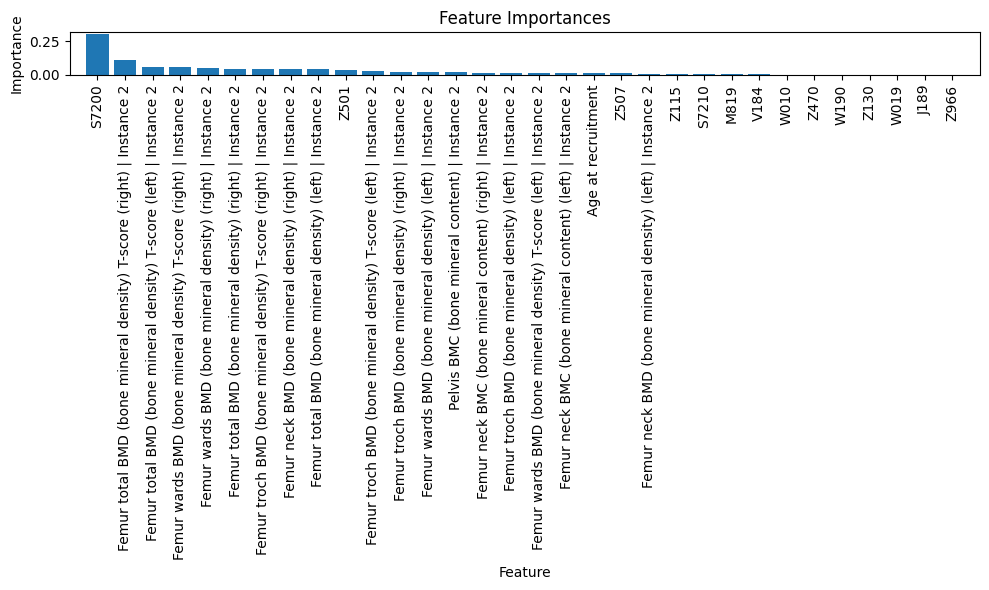

In [42]:
best_model = grid_search.best_estimator_

# Get feature importances
importances = best_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
score2 = cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='recall')
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)
print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier

# Define the parameter grid
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
grid_search_xg = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    cv=kf,
).fit(X_train, y_train)
grid_search_xg

In [ ]:
print('Best parameters:', grid_search_xg.best_params_)
print('Best score:', grid_search_xg.best_score_)

In [ ]:
y_pred_tr = grid_search_xg.best_estimator_.predict(X_train)
y_pred = grid_search_xg.best_estimator_.predict(X_test)

In [ ]:
x1 = calculate_metrics(true=y_train, predictions=y_pred_tr)
x2 = calculate_metrics(true=y_test, predictions=y_pred)

grid_scores_xg =  pd.DataFrame(data = x1 + x2, columns=
                        ['Accuracy', 'Sensitivity', 'Specificity', 'Precision','F1 Score'])
grid_scores_xg.insert(0, 'Model', ["XGBoost", 'XGBoost'])
grid_scores_xg.insert(1, 'Data', ['Train Data', 'Test Data'])

grid_scores_xg

In [ ]:
score2 = cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='recall')
grid_cv_score = score2.mean()
grid_cv_stdev = stdev(score2)
print('Cross Validation Recall scores are: {}'.format(score2))
print('Average Cross Validation Recall score: ', grid_cv_score)
print('Cross Validation Recall standard deviation: ', grid_cv_stdev)

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)

# Create a GridSearchCV object
grid_search_svc = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=kf,
).fit(X_train, y_train)
print("Best parameters:", grid_search_svc.best_params_)
predictions = grid_search_svc.predict(X_test)


In [ ]:
print('Best parameters:', grid_search_svc.best_params_)
print('Best score:', grid_search_svc.best_score_)

In [ ]:
y_pred_tr = grid_search_svc.best_estimator_.predict(X_train)
y_pred = grid_search_svc.best_estimator_.predict(X_test)

In [ ]:
x1 = calculate_metrics(true=y_train, predictions=y_pred_tr)
x2 = calculate_metrics(true=y_test, predictions=y_pred)

grid_scores_svc =  pd.DataFrame(data = x1 + x2, columns=
                        ['Accuracy', 'Sensitivity', 'Specificity', 'Precision','F1 Score'])
grid_scores_svc.insert(0, 'Model', ["SVC", 'SVC'])
grid_scores_svc.insert(1, 'Data', ['Train Data', 'Test Data'])
grid_scores_svc


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}


ada_boost = AdaBoostClassifier()

# Create a GridSearchCV object
grid_search_ada = GridSearchCV(
    estimator=ada_boost,
    param_grid=param_grid,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
).fit(X_train, y_train)


best_params = grid_search_ada.best_params_
print("Best parameters for AdaBoost:", best_params)
predictions = grid_search_ada.predict(X_test)

In [ ]:
print('Best parameters:', grid_search_ada.best_params_)
print('Best score:', grid_search_ada.best_score_)

In [ ]:
y_pred_tr = grid_search_ada.best_estimator_.predict(X_train)
y_pred = grid_search_ada.best_estimator_.predict(X_test)

In [ ]:
x1 = calculate_metrics(true=y_train, predictions=y_pred_tr)
x2 = calculate_metrics(true=y_test, predictions=y_pred)

grid_scores_ada =  pd.DataFrame(data = x1 + x2, columns=
                        ['Accuracy', 'Sensitivity', 'Specificity', 'Precision','F1 Score'])
grid_scores_ada.insert(0, 'Model', ["Ada Boost", 'Ada Boost'])
grid_scores_ada.insert(1, 'Data', ['Train Data', 'Test Data'])
grid_scores_ada
